In [1]:
from torchvision import *
import torch
from torch import nn
import torch
import torch.nn as nn
import torch.optim as optim
from splitResNet50 import SplitResNet50
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs,5)
model = model.to(device)

splited_model = SplitResNet50(model)

/Users/genki/.local/share/virtualenvs/create_model-mKn3cYmg/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/genki/.local/share/virtualenvs/create_model-mKn3cYmg/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
from crossEntropyOSLoss import CrossEntropyOSLoss
from model_trainer import ModelTrainer
from torch.optim import lr_scheduler

optimizer_ft = optim.SGD(splited_model.parameters(),lr=0.001,momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

alpha = 0.01
loss_function = CrossEntropyOSLoss(alpha,device)

model_trainer = ModelTrainer(splited_model,loss_function,optimizer_ft,exp_lr_scheduler,device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].


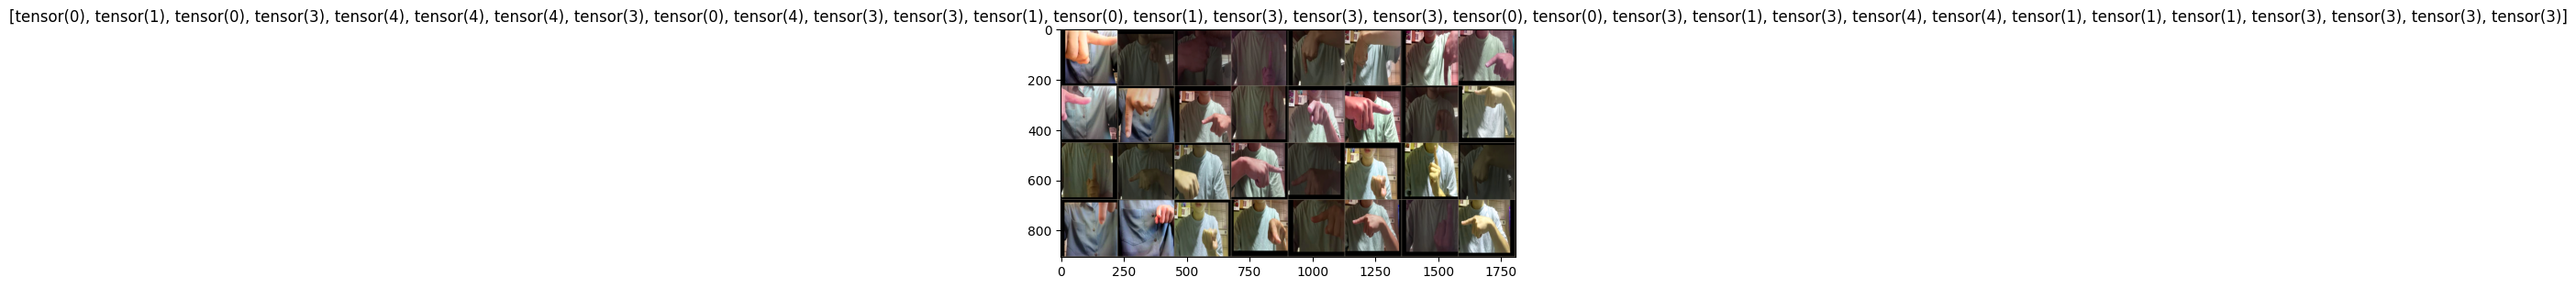

Epoch 0/9
----------
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 

KeyboardInterrupt: 

In [3]:
import visual_utils

data_transforms = {
    "train":transforms.Compose([
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
    "test":transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
}

data_path = "datasets_2024-09-20"

model_trainer.make_dataloader(transformars=data_transforms,data_path=data_path,batch_size=32,shuffle=True,num_workers=1)

inputs,classes = next(iter(model_trainer.get_data_loader()["train"]))

out = utils.make_grid(inputs)

visual_utils.imshow(out,title=[classes[x] for x in classes])

model_ft = model_trainer.train_model(num_epochs=10)

visual_utils.visualize_model(model_ft)

pth_save_dir : str = "./finger_pose_model.pth"
onnx_save_dir : str = "./finger_pose_model.onnx"

model_trainer.save_model(pth_save_path=pth_save_dir,onnx_save_path=onnx_save_dir)
